In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 



In [2]:
df=pd.read_csv("te_marks.csv")


In [3]:
df=df.iloc[:,1:4]

In [4]:
df

,Name,Gender,cgpa
0,ADE SHUBHAM PRADEEP,M,8.40
1,ADITYA DATTATRAY TAJANE,M,8.19
2,ADITYA PAWAR,M,7.43
3,AKANKSHA DILIP DHEBE,F,0.00
4,AKASH DEEPAK SHRIVASTAV,M,6.88
...,...,...,...
74,WANJARI GAURAV SURENDRA,M,8.26
75,YELURE MAHADEV MALLINATH,M,8.45
76,YOJIT PREMENDRA WAGHMARE,M,7.93
77,LOKHANDE NISHANT VITTHAL,M,0.00


In [5]:
en_data=df[["Gender"]]

In [6]:
new_data=pd.get_dummies(en_data)

In [7]:
# new_data.drop(columns=["Gender_F"],inplace=True)

In [8]:
new_data['Gender_M']=new_data['Gender_M'].astype(int)

In [9]:
new_data

,Gender_F,Gender_M
0,False,1
1,False,1
2,False,1
3,True,0
4,False,1
...,...,...
74,False,1
75,False,1
76,False,1
77,False,1


In [10]:
df["Gender_M"]=new_data['Gender_M']

In [11]:
df.drop(columns=["Gender"],inplace=True)

In [12]:
df.head(1)

,Name,cgpa,Gender_M
0,ADE SHUBHAM PRADEEP,8.4,1


In [13]:
list=[]
for i in range(0,df.shape[0]):
   if(df["Gender_M"][i]==1):
       col=[]
       for j in df.columns:
           col.append(df[j][i])
       list.append(col)

In [14]:
list[0][0]

'ADE SHUBHAM PRADEEP'

In [15]:
my_data=pd.DataFrame(list ,columns=["name","cgpa","Gender"])

In [16]:
df_sorted = my_data.sort_values(by='cgpa',ascending=False)

In [17]:
# df_sorted.save

AttributeError: 'DataFrame' object has no attribute 'save'

In [18]:
df_sorted.to_excel('filtered_data.xlsx', index=False)

In [19]:
df.head(1)

,Name,cgpa,Gender_M
0,ADE SHUBHAM PRADEEP,8.4,1


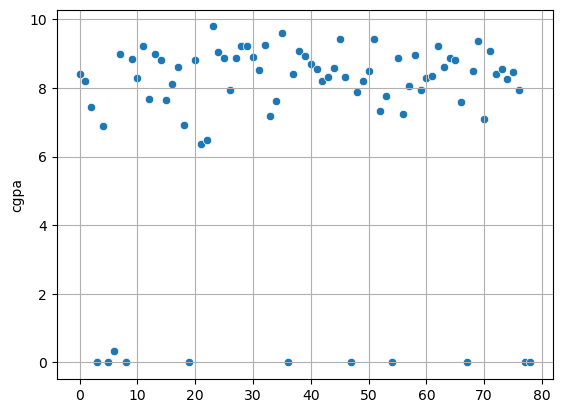

In [22]:
sns.scatterplot(x=[i for i in range(0,df.shape[0])],y="cgpa", data=df)
plt.grid()

C:\Users\91935\AppData\Local\Temp\ipykernel_7420\515481754.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['cgpa'])


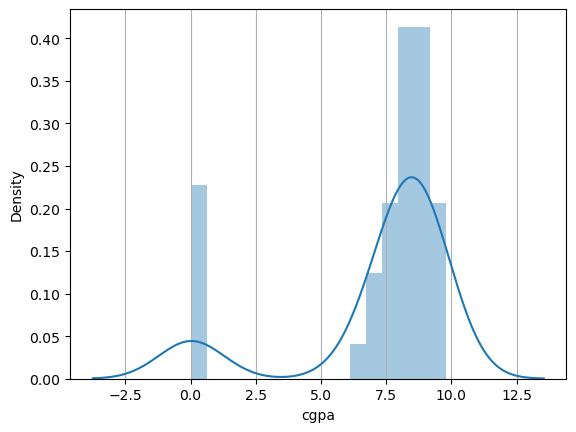

In [32]:
sns.distplot(df['cgpa'])
plt.grid(axis="x")

In [38]:
from sklearn.preprocessing import FunctionTransformer
import numpy as np

In [40]:
ft=FunctionTransformer(func=np.log1p)

In [42]:
ft.fit(df["cgpa"]);

In [46]:
df["new_cgpa"]=pd.DataFrame(ft.transform(df["cgpa"]))

In [48]:
df

,Name,cgpa,Gender_M,new_cgpa
0,ADE SHUBHAM PRADEEP,8.40,1,2.240710
1,ADITYA DATTATRAY TAJANE,8.19,1,2.218116
2,ADITYA PAWAR,7.43,1,2.131797
3,AKANKSHA DILIP DHEBE,0.00,0,0.000000
4,AKASH DEEPAK SHRIVASTAV,6.88,1,2.064328
...,...,...,...,...
74,WANJARI GAURAV SURENDRA,8.26,1,2.225704
75,YELURE MAHADEV MALLINATH,8.45,1,2.246015
76,YOJIT PREMENDRA WAGHMARE,7.93,1,2.189416
77,LOKHANDE NISHANT VITTHAL,0.00,1,0.000000


C:\Users\91935\AppData\Local\Temp\ipykernel_7420\3764873117.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['cgpa'])
C:\Users\91935\AppData\Local\Temp\ipykernel_7420\3764873117.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["new_cgpa"])


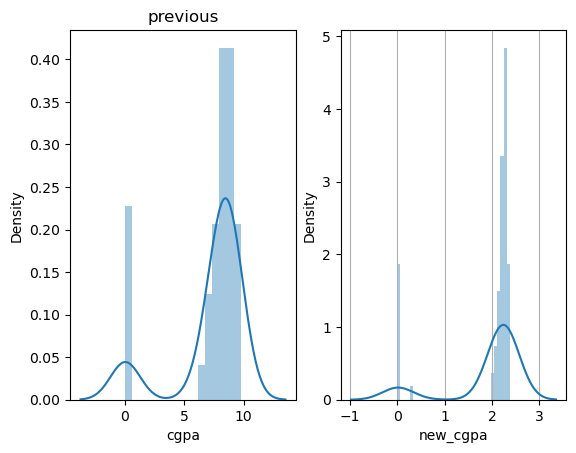

In [58]:
plt.subplot(1,2,1)
plt.title("previous")
sns.distplot(df['cgpa'])
plt.subplot(1,2,2)
sns.distplot(df["new_cgpa"])
plt.grid(axis="x")
plt.show()

In [74]:
sns.scatterplot(df['cgpa'],df["new_cgpa"],c="red")


TypeError: scatterplot() takes from 0 to 1 positional arguments but 2 were given